In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [3]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [4]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [5]:
df1 = pd.read_csv("KDDTrain+.csv", names = feature)
df2 = pd.read_csv("KDDTest+.csv", names = feature)
df = pd.concat([df1, df2], axis=0)
df.drop(["junk"],axis = 1,inplace = True)

In [6]:
df2.isnull().values.any()

False

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [9]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [10]:
change_feature(df)

In [11]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [12]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [13]:
change_target(df)

In [14]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1,34,8,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,0,0,8,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,66,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,3
3,0,1,12,8,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,12,8,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [15]:
df_lis = np.array(df.values.tolist())

In [16]:
from scipy.stats import pearsonr

In [17]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [18]:
for i in range(np.shape(features)[1]):
    if(np.std(features[:,i])!=0):
        features[:,i] = (features[:,i]-np.mean(features[:,i]))/np.std(features[:,i]) 
    else:
        features[:,i] = (features[:,i]-np.mean(features[:,i]))
np.shape(features)

(148517, 41)

In [19]:
np.shape(features),np.shape(labels)

((148517, 41), (148517,))

In [20]:
train_X = features[:len(df1)]
test_X = features[len(df1):]
train_Y = labels[:len(df1)]
test_Y = labels[len(df1):]

## Data Distribution

In [21]:
from sklearn.manifold import TSNE
import seaborn as sns

In [22]:
def tsne_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    #c=palette[colors.astype(np.int)]   
    print(np.shape(palette))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], c=palette[colors-2])
    ax.axis('tight')
    plt.title("TSNE plot for final vectors from BERT")
    return f, ax, sc

In [27]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(train_X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 125973 samples in 0.006s...
[t-SNE] Computed neighbors for 125973 samples in 227.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 125973
[t-SNE] Computed conditional probabilities for sample 2000 / 125973
[t-SNE] Computed conditional probabilities for sample 3000 / 125973
[t-SNE] Computed conditional probabilities for sample 4000 / 125973
[t-SNE] Computed conditional probabilities for sample 5000 / 125973
[t-SNE] Computed conditional probabilities for sample 6000 / 125973
[t-SNE] Computed conditional probabilities for sample 7000 / 125973
[t-SNE] Computed conditional probabilities for sample 8000 / 125973
[t-SNE] Computed conditional probabilities for sample 9000 / 125973
[t-SNE] Computed conditional probabilities for sample 10000 / 125973
[t-SNE] Computed conditional probabilities for sample 11000 / 125973
[t-SNE] Computed conditional probabilities for sample 12000 / 125973
[t-SNE] Computed conditional proba

[Text(0.5, 1.0, 'KDDTrain+ data T-SNE projection')]

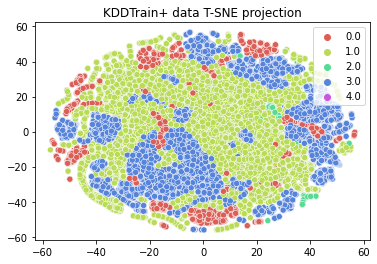

In [33]:
sns.scatterplot(x=z[:,0], y=z[:,1], hue=train_Y,
                palette=sns.color_palette("hls", 5),
                data=train_X).set(title="KDDTrain+ data T-SNE projection") 

In [34]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(test_X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22544 samples in 0.001s...
[t-SNE] Computed neighbors for 22544 samples in 9.396s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22544
[t-SNE] Computed conditional probabilities for sample 2000 / 22544
[t-SNE] Computed conditional probabilities for sample 3000 / 22544
[t-SNE] Computed conditional probabilities for sample 4000 / 22544
[t-SNE] Computed conditional probabilities for sample 5000 / 22544
[t-SNE] Computed conditional probabilities for sample 6000 / 22544
[t-SNE] Computed conditional probabilities for sample 7000 / 22544
[t-SNE] Computed conditional probabilities for sample 8000 / 22544
[t-SNE] Computed conditional probabilities for sample 9000 / 22544
[t-SNE] Computed conditional probabilities for sample 10000 / 22544
[t-SNE] Computed conditional probabilities for sample 11000 / 22544
[t-SNE] Computed conditional probabilities for sample 12000 / 22544
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'KDDTest+ data T-SNE projection')]

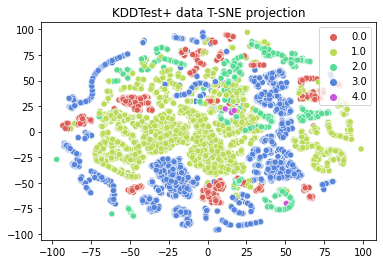

In [39]:
sns.scatterplot(x=z[:,0], y=z[:,1], hue=test_Y,
                palette=sns.color_palette("hls", 5),
                data=test_X).set(title="KDDTest+ data T-SNE projection") 